In [3]:
%matplotlib inline

In [15]:
import itertools 
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import numpy as np
import pandas as pd

# (scale, length, randomness).)
#plt.xkcd()
#import highlight_text as ht

import intro_plots as ip
from papercolors import colordict as pcd

paper_path = Path('../figures/')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\story\\miniconda3\\envs\\paper\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [5]:
# tau 
df = pd.read_parquet("nydata_2022.parquet")

In [6]:
df['NAME']

0                 BINGHAMTON
1               LAGUARDIA AP
2         ROCHESTER GTR INTL
3         ROCHESTER GTR INTL
4      ISLIP-LI MACARTHUR AP
               ...          
269    ISLIP-LI MACARTHUR AP
270    ISLIP-LI MACARTHUR AP
271           GLENS FALLS AP
272             LAGUARDIA AP
273               BINGHAMTON
Name: NAME, Length: 3253, dtype: string

In [7]:
df['AC'] = df['NAME'].replace(ip.airport_codes)

AttributeError: module 'intro_plots' has no attribute 'airport_codes'

In [8]:
color=pcd['fiber']
rows = ["NAME", "TEMP (°F)", "PRCP (in.)"]

fiber_node = (r"<$F_{node}=$>"+ f"<{rows[0]}>:" + r"<$\{st_0,\;\dots,\;st_n\}\; \times$>" + 
              f"<{rows[1]}>:" + r"<$\mathbb{R}\;\times$>" +
              f"<{rows[2]}>:" + r"<$\mathbb{R}^{+}$>")


fnprops = [{"color":pcd['fiber'], 'fontsize':12}, {"color":"gray","fontsize":10}, 
           {"color":pcd['fiber'], 'fontsize':12}, 
           {"color":"gray","fontsize":10}, {"color":pcd['fiber'], 'fontsize':12}, 
           {"color":"gray","fontsize":10}, {"color":pcd['fiber'], 'fontsize':12}]

fiber_edge = r"<$F_{edge}$>" + "<DISTANCE>:" +r"<$\mathbb{R}^{+}$>"
feprops = [{"color":pcd['fiber'], 'fontsize':12}, {"color":"gray","fontsize":10}, 
           {"color":pcd['fiber'], 'fontsize':12}
          
          
          
          
          ]
section = r"<$\tau($>" + "<{k}>" + r"<$)$>"
section_line = r"<$\tau($>" + "<({ks}, {kt}), {k}>" + r"<$)$>"
fiber_line = r"$\mathbb{R}^{+}$"

#x = np.linspace(-5,5,10000)
#y = lambda x: (1/np.sqrt(2*np.pi))*np.e**(-x**2/2)



In [9]:
row = df[['AC','NAME', 'TEMP (°F)', 'PRCP (in.)', "NEW YORK JFK INTL AP"]].loc[0]
section_node = (section + 
'''< = {{><{k}><, ><({v1},> <{v2}°,> <{v3})><}}>''') 
sprops = [{"color":pcd['section']}, {'color':pcd['base']}, {'color':pcd['section']}, 
          {'color':pcd['section']}, {'color':pcd['base']},  {'color':pcd['section']},
         {'color':ip.cdict[row['NAME']]}, {'color':ip.cdict[row['NAME']]}, {'color':ip.cdict[row['NAME']]},  
          {'color':pcd['section']}]
#print(section_node.format(k=0, v1=row['NAME'], v2=row['TEMP (°F)'], v3=row['PRCP (in.)']))
section_edge = (section_line + """<= {{><(({ks},{kt}),{k})><,({v:.2f})}}>""")
seprops = [{"color":pcd['section']}, {'color':pcd['base']}, {'color':pcd['section']}, 
           {'color':pcd['section']}, {'color':pcd['base']},  {'color':pcd['section']}]

KeyError: "['AC', 'TEMP (°F)', 'PRCP (in.)', 'NEW YORK JFK INTL AP'] not in index"

In [10]:
def make_node(fig, ax):
    yloc = 1.25
    ypts = .2
    xpts = [.1, 2.9]
        
    ht.ax_text(.05, yloc, s=fiber_node, highlight_textprops=fnprops, ha='left', va='bottom', 
               ax=ax, transform=ax.transAxes)

    # node section
    ynmid = ypts+(yloc-ypts)/2
    pin = mpatches.FancyArrowPatch((xpts[0], yloc), (xpts[0], ypts), 
                                      arrowstyle='->', mutation_scale=20, color='gray')
    ax.add_artist(pin)
    ax.text(xpts[0], ynmid, r"$\pi$", color="gray", ha='right', va='center')
    
    ht.ax_text(xpts[0]+.1, ynmid+.1, section_node.format(k=0, v1=row['AC'], v2=row['TEMP (°F)'], v3=row['PRCP (in.)']), 
               highlight_textprops=sprops, fontsize=10)
    tau1 = mpatches.FancyArrowPatch((xpts[0], ypts), (xpts[0], yloc), color=pcd['section'],
                                     connectionstyle='arc3,rad=.2',  arrowstyle='->', mutation_scale=20)
    ax.add_artist(tau1)
    
    #edge section
    xloc = 2.3
    yloff = .3
    ht.ax_text(xloc, yloc-yloff, s=fiber_edge, highlight_textprops=feprops, ha='center', va='bottom' )
    
    xe = xloc-.4
    
    yemid = ypts + (yloc-yloff - ypts)/2
    pie = mpatches.FancyArrowPatch((xe, yloc-yloff), (xe, ypts), arrowstyle='->', 
                                   mutation_scale=20, color='gray')
    ax.add_artist(pie)
    ax.text(xe-.01, yemid, r"$\pi$", color="gray", ha='right', va='center')
    
    ht.ax_text(xe+.075, yemid, s=section_edge.format(ks=0, kt=2, k=.8, v= row["NEW YORK JFK INTL AP"]), 
                                                     highlight_textprops=seprops)
    tau2 = mpatches.FancyArrowPatch((xe, ypts), (xe, yloc-yloff), color=pcd['section'],
                                     connectionstyle='arc3,rad=.2',  arrowstyle='->', mutation_scale=20)
    ax.add_artist(tau2)
  
    ax.plot(xpts,[ypts, ypts],  color=pcd['base'], marker='o')
    for i, x in enumerate([xpts[0], xpts[0]+(xpts[1]-xpts[0])/2, xpts[1]]):
        ax.text(x, ypts-.03, f"$K_{i}$",color=pcd['base'], va='top', ha='center')
    
    ax.set(xlim=(0, 3), ylim=(0, 1.5), aspect='equal', yticks=[], xticks=[])
    ax.axis('off')

In [11]:
row = df[['NAME', 'TAVG', 'PRCP']][(df['NAME']=="JFK INTL AP")].loc[237].iloc[-1]

In [12]:
row ##axrho.set(ylim=(.655, .6675), xlim=(33.75, 34.25))

NAME    JFK INTL AP
TAVG          66.02
PRCP       0.311023
Name: 237, dtype: object

0.0 0.5
0.55 0.8250000000000001
0.8 0.3


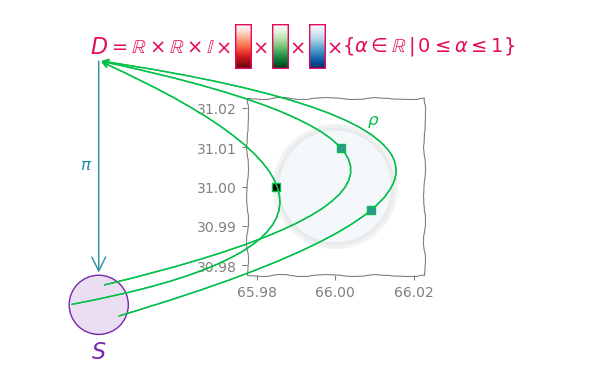

In [265]:
fig, ax = plt.subplots(figsize=(6,6), layout='constrained')

ft = 14
x0 = .15
D = ax.text(.15,.925, r"$D$",  fontsize=ft+2, color=pcd['fiber'], ha='center', va='baseline')
tf = ax.annotate(r"$= \mathbb{R}\times\mathbb{R}\times\mathbb{I}$", xy=(1,.5), xycoords=D,
            fontsize=ft, color=pcd['fiber'], ha='left', va='center')

N = 30
M = 10
arr = np.repeat(np.linspace(0,1, N), M).reshape(N,M)
pad = 1
cfiber = np.ones((N+pad*2, M+pad*2))*2
cfiber[pad:-pad, pad:-pad] = arr
norm = mcolors.Normalize(vmin=0, vmax=1)

#(left, right, bottom, top)
va = 'bottom'
ha = 'left'
xy = (1,0)
xycoords = tf


for cname in ["Reds", "Greens", "Blues"]:
    
    times = ax.annotate(r"$\times$", xycoords=xycoords, xy = xy, fontsize=ft, color=pcd['fiber'], va=va, ha=ha)
    cmap = mpl.colormaps[cname].resampled(N).with_extremes(over=pcd['fiber'])
    im = OffsetImage(cfiber, cmap=cmap, norm=norm)
    im.image.axes = ax
    
    ab = AnnotationBbox(im, xy = (1.8, .5), xycoords=times, frameon=False)
    ax.add_artist(ab)
    
    ha = 'center'
    xy = (1.5, 0)
    xycoords = (im, tf)
    
times = ax.annotate(r"$ \times$", 
            xy=xy, xycoords=xycoords, fontsize=ft, color=pcd['fiber'], ha=ha, va=va)

ax.annotate(r"$\{\alpha \in \mathbb{R} \,\vert \, 0\leq \alpha \leq 1\}$", 
            xy=(1,.55), xycoords=times, fontsize=ft, color=pcd['fiber'], ha='left', va='center')


K = mpatches.Circle((x0, .5), .05, edgecolor=pcd['base'], facecolor=mcolors.to_rgba(pcd['base'], alpha=.15))
ax.add_patch(K)

pi_arr = ax.annotate("", xy=(.5, 1), xycoords=K, xytext=(.5, 0), textcoords=D, arrowprops=dict(arrowstyle='->', color=pcd['total'], mutation_scale=25))
pi_lab = ax.annotate(r"$\pi$", xy=(0,.5), xycoords=pi_arr, fontsize=ft-2, color=pcd['total'], va='center', ha='right')

ax.annotate(r"$S$", xy=(.5, -.1), xycoords=K, color=pcd['base'], fontsize=ft+2, va='top', ha='center')


x, y = (row['TAVG'],row['PRCP'])
axrho = ax.inset_axes([.35, .25, .4, .5])
axrho.spines[:].set_sketch_params(1, 100, 10)
axrho.spines[:].set_color('gray')
axrho.tick_params(colors='gray')
cinner = 'steelblue'

#sc = axrho.scatter(x,y, color= cinner, s=6000, edgecolor='k', lw=2, alpha=.05)
x, y = (66, 31) 
r = .015
sc = mpatches.Circle((x,y), radius=r, facecolor=cinner, edgecolor='k', lw=5, alpha=.05)
axrho.add_patch(sc)
axrho.set_aspect('equal')

axrho.set(xlim=(x-1.5*r, x+1.5*r), ylim=(y-1.5*r, y+1.5*r))
ax.set_aspect('equal')
ax.set(ylim=(.4, 1))
for (xr, yr, c, cs) in [(-r, 0, 'k', "arc3,rad=1.6"), (r*.1, r*.65, cinner, "arc3,rad=2.225"), (r*.6, -r*.4, cinner, "arc3,rad=2.25")]:
    axrho.scatter(x+xr, y+yr, color=c, marker='s', s=40, edgecolor=pcd['section'], linewidth=1, zorder=10)
    px = (r+xr)/(r*2)
    py = (r+yr)/(r*2)
    print(px, py)
    sec = ax.annotate("", xytext=(px, py), textcoords=K, xy=(.5, -.1), xycoords=D, arrowprops={'arrowstyle':'->', 'color':pcd['section'],'connectionstyle':cs}, zorder=6)
    ax.add_artist(sec)

ax.annotate(r"$\rho$", (.9, .75), xycoords=sec, fontsize=ft-2, color=pcd['section'], zorder=6)
ax.tick_params('both', length=0)
ax.set(xticklabels=[], yticklabels=[]) 
ax.axis('off')
fig.savefig("../figures/fb_rho.png", dpi=300, bbox_inches='tight')
fig.savefig("../figures/fb_rho.pdf", dpi=300, bbox_inches='tight')

In [155]:
sc.get_radius()

0.01

In [144]:
sc.get_paths()[0]

Path(array([[ 0.        , -0.5       ],
       [ 0.13260155, -0.5       ],
       [ 0.25978994, -0.44731685],
       [ 0.35355339, -0.35355339],
       [ 0.44731685, -0.25978994],
       [ 0.5       , -0.13260155],
       [ 0.5       ,  0.        ],
       [ 0.5       ,  0.13260155],
       [ 0.44731685,  0.25978994],
       [ 0.35355339,  0.35355339],
       [ 0.25978994,  0.44731685],
       [ 0.13260155,  0.5       ],
       [ 0.        ,  0.5       ],
       [-0.13260155,  0.5       ],
       [-0.25978994,  0.44731685],
       [-0.35355339,  0.35355339],
       [-0.44731685,  0.25978994],
       [-0.5       ,  0.13260155],
       [-0.5       ,  0.        ],
       [-0.5       , -0.13260155],
       [-0.44731685, -0.25978994],
       [-0.35355339, -0.35355339],
       [-0.25978994, -0.44731685],
       [-0.13260155, -0.5       ],
       [ 0.        , -0.5       ],
       [ 0.        , -0.5       ]]), array([ 1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        

In [148]:
 axrho.transData.transform_path(sc.get_paths()[0])

Path(array([[238.05630631, 224.80227392],
       [238.45709909, 224.80227392],
       [238.84153039, 224.82613492],
       [239.12493369, 224.8686018 ],
       [239.40833698, 224.91106869],
       [239.56757364, 224.96867423],
       [239.56757364, 225.02873147],
       [239.56757364, 225.08878872],
       [239.40833698, 225.14639426],
       [239.12493369, 225.18886114],
       [238.84153039, 225.23132803],
       [238.45709909, 225.25518902],
       [238.05630631, 225.25518902],
       [237.65551353, 225.25518902],
       [237.27108223, 225.23132803],
       [236.98767894, 225.18886114],
       [236.70427565, 225.14639426],
       [236.54503899, 225.08878872],
       [236.54503899, 225.02873147],
       [236.54503899, 224.96867423],
       [236.70427565, 224.91106869],
       [236.98767894, 224.8686018 ],
       [237.27108223, 224.82613492],
       [237.65551353, 224.80227392],
       [238.05630631, 224.80227392],
       [238.05630631, 224.80227392]]), array([ 1,  4,  4,  4,  4,  4, 

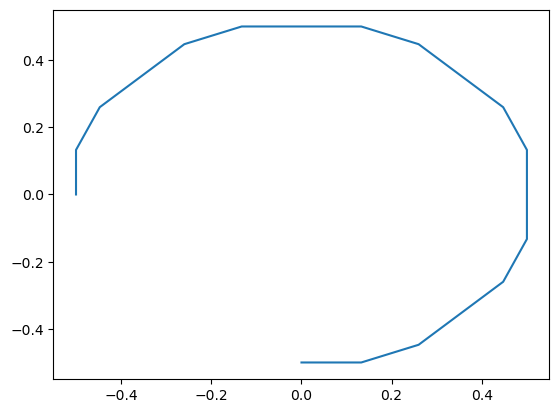

In [112]:
plt.plot(sc.get_paths()[0].vertices[:,0][:19], sc.get_paths()[0].vertices[:,1][:19] )

In [ ]:
yb = .25

ax.text(xt, yb-.15, r"$S$", va='center', ha='center', color=pcd['base'], fontsize=12)

ax.text(xt-.01 ,.5, r"$\pi$", ha='right', fontsize=12, color=pcd['total'])

pi = mpatches.FancyArrowPatch((xt, .79),(xt, yb+.1), arrowstyle='->', mutation_scale=20, color=pcd['total'])
ax.add_artist(pi)
              
#ax.text(.6,.5, r"$\rho$ =", ha='left', va='center', fontsize=12, color=pcd['section'])
x, y = (row['TAVG'],row['PRCP'])
axrho = ax.inset_axes([.45, .35, .35, .35])
axrho.spines[:].set_sketch_params(1, 100, 10)
axrho.spines[:].set_color('gray')
axrho.tick_params(colors='gray')
cinner = 'steelblue'

axrho.scatter(x,y, color= cinner, s=6000, edgecolor='k', lw=2, alpha=.05)


gsecs = [(.075, .00145, -0.05, -.07, cinner, 'arc3,rad=2'), 
         (.0015, -.004, -.05, -.05, cinner, 'arc3,rad=1.71'), 
         (-.165, 0, 0, .02, 'k', 'arc3,rad=1.225')]

for  (xo, yo, jx, jy, co, cs) in gsecs:
    rho = mpatches.FancyArrowPatch((xt+jx, yb+jy), (xt, .79),
                               arrowstyle='->', connectionstyle=cs,
                               mutation_scale=20, color=pcd['section'], zorder=6)
    
    ax.add_artist(rho)
  
    ax.scatter(x + xo,  y + yo, color=co, marker='s',
                  s=40, edgecolor=pcd['section'], linewidth=.5, zorder=12, 
                 transform=axrho.transData)

ax.text(.65, yb-.025, r"$\rho$", color=pcd['section'])

axrho.set(ylim=(y-.025, y+.025), xlim=(x-.25, x+.25))
ax.set(xlim=(.2,1.2), ylim=(0,1), aspect='equal')


#ax.axis('off')
fig.savefig("../figures/fb_rho.png", dpi=300, bbox_inches='tight')
fig.savefig("../figures/fb_rho.pdf", dpi=300, bbox_inches='tight')